# 0 필요한 라이브러리 임포트

In [1]:
# 필요한 라이브러리를 임포트합니다.
import pandas as pd  # 데이터 조작 및 분석을 위한 라이브러리
import numpy as np  # 수치 계산을 위한 라이브러리
import wfdb  # 심전도 데이터를 읽기 위한 라이브러리
import ast  # 문자열 형태의 파이썬 표현식을 파싱하기 위한 라이브러리
from tqdm import tqdm  # 반복 작업의 진행 상황을 시각적으로 표시하기 위한 라이브러리
import warnings; warnings.filterwarnings('ignore')  # 경고 메시지를 무시하기 위한 설정
from IPython.display import display  # Jupyter 노트북에서 데이터를 깔끔하게 보여주기 위한 함수
from glob import glob # 하위 디렉토리에 파일을 가져와서 다루기위한 라이브러리 
import os # 현재 워킹디렉토리의 경로와 파일을 다루기 위한 라이브러리 
import h5py #.h5파일을 다루기 위한 라이브러리 
import gc #가비치 컬렉터를 다루는 라이브러리

# 데이터 시각화를 위한 라이브러리를 임포트합니다.
import matplotlib.pyplot as plt  # 그래프를 그리기 위한 라이브러리
import seaborn as sns  # matplotlib 기반의 고급 시각화 라이브러리

#머신러닝을 위한 scikit-learn 임포트 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report

In [132]:
import os
os.environ['CUDA_LAUNCH_BLOCKING'] = "1"
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

In [ ]:
#파이토치에서 gpu를 사용할수 있는지 확인하기 
print(torch.cuda.is_available())

# 사용가능하다면 사용하기 
device = torch.device('cuda:0') if torch.cuda.is_available() else torch.device('cpu')

: 

# 1. eda
- 1-1 데이터 불러오기 및 변수 생성하기  

## 1-1 데이터 불러오기 및 변수 생성하기  

- df_ptb: ptb메타 데이터 
- df_sph: sph 메타데이터 
- df_ptb_lead1: ptb-xl lead1 데이터 
- df_sph_lead1: sph lead1 데이터

In [ ]:
os.getcwd()


'/root/harbud/ecg'

: 

In [2]:
# 데이터 프레임 로드
path = './ptb_xl_data/'
df_ptb = pd.read_csv(path + 'ptbxl_database.csv', index_col='ecg_id')

# 파일 이름 리스트 변환
filenames = df_ptb['filename_hr'].tolist()
base_path = './ptb_xl_data/'

# Lead I 신호를 저장할 배열 초기화
lead1_signals = []

# 각 파일에서 Lead I 신호 추출
for filename in tqdm(filenames):
    signal, meta = wfdb.rdsamp(base_path + filename)

    # 신호 데이터 타입을 float32로 변경
    # signal = signal.astype(np.float32)
    
    lead1 = signal[:, 0]  # Lead I 신호 추출
    lead1_signals.append(lead1)

    # 사용하지 않는 변수 해제
    # del signal, meta
    # gc.collect()  # 가비지 컬렉터 실행


# 배열을 numpy 배열로 변환
df_ptb_lead1 = np.array(lead1_signals)

# 최종 배열 형태 확인
print("Final array shape:", df_ptb_lead1.shape)



100%|██████████| 21799/21799 [01:50<00:00, 196.70it/s]


Final array shape: (21799, 5000)


In [3]:
df_ptb

,patient_id,age,sex,height,weight,nurse,site,device,recording_date,report,...,validated_by_human,baseline_drift,static_noise,burst_noise,electrodes_problems,extra_beats,pacemaker,strat_fold,filename_lr,filename_hr
ecg_id,,,,,,,,,,,,,,,,,,,,,
1,15709.0,56.0,1,NaN,63.0,2.0,0.0,CS-12 E,1984-11-09 09:17:34,sinusrhythmus periphere niederspannung,...,True,NaN,", I-V1,",NaN,NaN,NaN,NaN,3,records100/00000/00001_lr,records500/00000/00001_hr
2,13243.0,19.0,0,NaN,70.0,2.0,0.0,CS-12 E,1984-11-14 12:55:37,sinusbradykardie sonst normales ekg,...,True,NaN,NaN,NaN,NaN,NaN,NaN,2,records100/00000/00002_lr,records500/00000/00002_hr
3,20372.0,37.0,1,NaN,69.0,2.0,0.0,CS-12 E,1984-11-15 12:49:10,sinusrhythmus normales ekg,...,True,NaN,NaN,NaN,NaN,NaN,NaN,5,records100/00000/00003_lr,records500/00000/00003_hr
4,17014.0,24.0,0,NaN,82.0,2.0,0.0,CS-12 E,1984-11-15 13:44:57,sinusrhythmus normales ekg,...,True,", II,III,AVF",NaN,NaN,NaN,NaN,NaN,3,records100/00000/00004_lr,records500/00000/00004_hr
5,17448.0,19.0,1,NaN,70.0,2.0,0.0,CS-12 E,1984-11-17 10:43:15,sinusrhythmus normales ekg,...,True,", III,AVR,AVF",NaN,NaN,NaN,NaN,NaN,4,records100/00000/00005_lr,records500/00000/00005_hr
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21833,17180.0,67.0,1,NaN,NaN,1.0,2.0,AT-60 3,2001-05-31 09:14:35,ventrikulÄre extrasystole(n) sinustachykardie ...,...,True,NaN,", alles,",NaN,NaN,1ES,NaN,7,records100/21000/21833_lr,records500/21000/21833_hr
21834,20703.0,300.0,0,NaN,NaN,1.0,2.0,AT-60 3,2001-06-05 11:33:39,sinusrhythmus lagetyp normal qrs(t) abnorm ...,...,True,NaN,NaN,NaN,NaN,NaN,NaN,4,records100/21000/21834_lr,records500/21000/21834_hr
21835,19311.0,59.0,1,NaN,NaN,1.0,2.0,AT-60 3,2001-06-08 10:30:27,sinusrhythmus lagetyp normal t abnorm in anter...,...,True,NaN,", I-AVR,",NaN,NaN,NaN,NaN,2,records100/21000/21835_lr,records500/21000/21835_hr


In [4]:
# .h5 파일 목록 가져오기
filenames = sorted(glob("./sph_data/records_sph/*.h5"))

# 메타데이터 로드 및 파일명 열 추가
df_sph = pd.read_csv("./sph_data/metadata.csv")
df_sph['filename'] = filenames

# Lead I 신호를 저장할 배열 초기화
lead1_signals_sph = []

# 각 파일에서 Lead I 신호 추출
for filename in tqdm(df_sph['filename']):
    with h5py.File(filename, 'r') as f:
        signal = f['ecg'][:].T

    lead1 = signal[:, 0]  # Lead I 신호 추출

    # 데이터 길이에 따른 처리
    if lead1.shape[0] == 5000:
        pass
    else:
        start_idx = np.random.randint(0, lead1.shape[0] - 4999)
        lead1 = lead1[start_idx:start_idx+5000]

    lead1_signals_sph.append(lead1)

# 배열을 numpy 배열로 변환
df_sph_lead1 = np.array(lead1_signals_sph)

# 최종 배열 형태 확인 및 저장
print("Final array shape:", df_sph_lead1.shape)

100%|██████████| 25770/25770 [01:04<00:00, 398.00it/s]


Final array shape: (25770, 5000)


In [5]:
gc.collect()

0

# 2. data preprocessing
- 2-1 df_ptb의 scp_codes를 이용하여 데이터 라벨링 
- 2-2 df_sph의 심방세동 라벨링 

## 2-1 df_ptb의 데이터 라벨 생성 

In [6]:
# str (문자열) 코드를 딕셔너리로 변환 
df_ptb.scp_codes = df_ptb.scp_codes.apply(lambda x: ast.literal_eval(x))

# 딕셔너리에서 라벨 추출 ()
df_ptb.scp_codes = df_ptb.scp_codes.apply(lambda x: list(x.keys()))

# 심방세동 라벨 컬럼 생성 (정답 컬럼)
df_ptb['label'] = df_ptb.scp_codes.apply(lambda arr: 1 if 'AFIB' in arr else 0)

# 밸류값 확인
df_ptb.label.value_counts()

label
0    20285
1     1514
Name: count, dtype: int64

## 2-2 df_sph의 심방 세동 라벨링 

In [7]:
# df_sph의 AHA_Code 항목을 통해 질별 자료 확인 
df_sph.AHA_Code

0         22;23
1             1
2             1
3            23
4           146
          ...  
25765       146
25766        23
25767       147
25768    22;147
25769        23
Name: AHA_Code, Length: 25770, dtype: object

In [8]:
# 'AHA_Code' 컬럼의 각 값에 대해 '50'이 포함되어 있는지 확인하고, 'label' 컬럼 생성
def check_contains_50(code):
    # 공백을 없애고, ';' 또는 '+'로 분리
    numbers = code.replace(' ', '').replace('+', ';').split(';')
    # '50'이 포함되어 있는지 확인
    return '50' in numbers
# 'label' 컬럼 생성
df_sph['label'] = df_sph['AHA_Code'].apply(check_contains_50).astype(int)

#밸류값 확인 
df_sph.label.value_counts()

label
0    25095
1      675
Name: count, dtype: int64

In [9]:
# 최종 데이터 샛 확인 
print(df_ptb.shape)
print(df_ptb_lead1.shape)
print(df_sph.shape)
print(df_sph_lead1.shape)

(21799, 28)
(21799, 5000)
(25770, 9)
(25770, 5000)


# 3. model 생성 및 학습 
- 라이브러리는 pytorch를 사용 
- 3-1 모델 셀렉팅 
- 3-2 파이토치 데이터 로더 생성 
- 3-3 모델 정의 
- 3-4 학습 

## 3-1 모델 셀렉팅 

## 3-2 파이토치 데이터 로더

In [10]:
#딥러닝 관련 파이토치 임포트

import torch
import torch.nn as nn
import torch.nn.functional as F
 
from torch.utils.data import TensorDataset # 텐서데이터셋
from torch.utils.data import DataLoader # 데이터로더
from torch.utils.data import Dataset # 데이터 셋

In [ ]:
# 커스텀 데이터 셋 정의 

class CustomDataset(Dataset):
    def __init__(self,X,y): # 데이터 셋 불러오기
        self.train=X
        self.label=y['label']

    def __len__(self): 
        return len(self.label)

    def __getitem__(self, idx): # 전체 x와 y 데이터 중에 해당 idx번째의 데이터를 가져옵니다.
        label = self.label.iloc[idx]
        return label

: 

In [ ]:
# 커스텀 데이터 셋 만들기 
coustomDataset=CustomDataset(df_ptb_lead1,df_ptb)

: 

In [ ]:
#데이터 분할 
train_size = int(0.8 * len(coustomDataset))

test_size = len(coustomDataset) - train_size


train_dataset, test_dataset = torch.utils.data.random_split(coustomDataset, [train_size, test_size])


: 

In [ ]:
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64,shuffle = True)
validation_loader = torch.utils.data.DataLoader(test_dataset, batch_size=64,shuffle = False)



: 

In [13]:
## 보경님 코드 
import torch
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold


# custom_file 폴더에서 lead1_signals 데이터 로드
lead1_signals = np.load('./custom_file/annie_ptb_xl_lead1.npy')


# 레이블 데이터 로드
labels = df_ptb['label'].values


# 데이터 정규화
lead1_signals_normalized = (lead1_signals - lead1_signals.mean()) / (lead1_signals.std()+1e-7)


# 데이터셋을 텐서로 변환
X = torch.Tensor(lead1_signals_normalized)
Y = torch.Tensor(labels)#.long()  # 레이블 데이터를 long 타입의 텐서로 변환


# 데이터 분할
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.25, random_state=42) # 0.25 x 0.8 = 0.2


# 채널 수를 1로 추가_GOOD
X_train = X_train.unsqueeze(1)
X_val = X_val.unsqueeze(1)
X_test = X_test.unsqueeze(1)


# DataLoader 생성
train_data = TensorDataset(X_train, Y_train)
val_data = TensorDataset(X_val, Y_val)
test_data = TensorDataset(X_test, Y_test)

batch_size = 64
# 마지막 불완전한 배치를 버림(drop_last는 없어야 함)
train_loader = DataLoader(train_data, shuffle=True, batch_size=batch_size)
val_loader = DataLoader(val_data, batch_size=batch_size)
test_loader = DataLoader(test_data, batch_size=batch_size)


# 간단한 CNN 모델 구축
class SimpleCNN(torch.nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = torch.nn.Conv1d(1, 32, kernel_size=5, stride=1) #output 4996
        self.pool = torch.nn.MaxPool1d(kernel_size=2, stride=2) # 2498
        self.conv2 = torch.nn.Conv1d(32, 64, kernel_size=5) # 2494
        self.fc1 = torch.nn.Linear(64 * 1247, 1000) 
        self.fc2 = torch.nn.Linear(1000, 500)
        self.fc3 = torch.nn.Linear(500, 1)  # 클래스가 2개이므로 출력 크기를 2로 설정

    def forward(self, x):
        x = self.pool(torch.nn.functional.relu(self.conv1(x)))
        x = self.pool(torch.nn.functional.relu(self.conv2(x)))
        x = x.view(-1, 64 * 1247)
        x = torch.nn.functional.relu(self.fc1(x))
        x = torch.nn.functional.relu(self.fc2(x))
        x = self.fc3(x)
        return x

model = SimpleCNN()

In [135]:

conv1 = torch.nn.Conv1d(1, 32, kernel_size=5, stride=1)
pool = torch.nn.MaxPool1d(kernel_size=2, stride=2) # 2498
conv2 = torch.nn.Conv1d(32, 64, kernel_size=5) # 2494


torch.Size([64, 32, 4996])


In [147]:
simpletest=torch.rand(64,1,5000)
out=pool(torch.nn.functional.relu(conv1(simpletest)))
print(out.shape)
out=pool(torch.nn.functional.relu(conv2(out)))
print(out.shape)

torch.Size([64, 32, 2498])
torch.Size([64, 64, 1247])


## 3-3 모델 정의 

In [ ]:
# 클래스 정의 하기 
class cnn_1d(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer1=torch.nn.Sequential(
            torch.nn.Conv1d(in_channels=1, out_channels=32, kernel_size=3)
            torch.nn.ReLU()
            torch.nn.Maxpool1d(kernel_size=2, stride=1)
           
            
        )
   
        self.layer2= torch.nn.Sequential(
            torch.nn.Conv1d(in_channels=32, out_channels=64, kernel_size=3)
            torch.nn.ReLU()
            torch.nn.Maxpool1d(kernel_size=2, stride=1)
        )
        self.fc1=torch.nn.Sequential(
            torch.nn.Linear(in_features=64, out_features=2)
            torch.nn.Sigmoid()
        )
        

    def forward(self, x): # forward함수 만들기 (실행)
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

: 

In [14]:
import torch
import torch.nn as nn
import torch.optim as optim
from tqdm import tqdm
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns


# 모델을 GPU로 옮기기
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = SimpleCNN().to(device)

# 손실 함수 정의 (이진 크로스 엔트로피)
criterion = torch.nn.BCEWithLogitsLoss() # 시그모이드가 포함되어있음!

# 옵티마이저 선택 (Adam)
optimizer = optim.Adam(model.parameters(), lr=0.001)


# 학습 및 검증 손실과 정확도를 기록할 리스트
train_losses = []
train_accuracies = []
val_losses = []
val_accuracies = []


# 학습 루프 설정
num_epochs = 10
for epoch in range(num_epochs):
    # 훈련 데이터 루프
    model.train()
    train_accuracy = 0
    train_loss = 0.0
    total = 0
    for inputs, labels in tqdm(train_loader, desc=f"Epoch {epoch+1}/{num_epochs} - Training"):
        inputs, labels = inputs.to(device), labels.to(device)  # 데이터를 GPU로 이동
        optimizer.zero_grad()  # 그래디언트 초기화

        # 순전파 및 역전파
        outputs = model(inputs)
        loss = criterion(outputs.view(-1), labels.float())
        loss.backward()
        optimizer.step()

        train_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        train_accuracy += (predicted == labels).sum().item()
        total += labels.size(0)
    
    train_losses.append(train_loss / len(train_loader))
    train_accuracies.append(train_accuracy / total)

    # 검증 데이터 루프
    model.eval()
    val_preds = []
    val_targets = []
    val_loss = 0.0
    total = 0
    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs.view(-1), labels.float())
            val_loss += loss.item()
            val_preds.extend(outputs.view(-1).cpu().numpy())
            val_targets.extend(labels.cpu().numpy())
            total += labels.size(0)

    val_loss /= len(val_loader)
    val_accuracy = accuracy_score(val_targets, np.round(val_preds))
    val_auroc = roc_auc_score(val_targets, val_preds)

    val_losses.append(val_loss)
    val_accuracies.append(val_accuracy)

    # 에포크의 결과 출력
    print(f'Epoch [{epoch + 1}/{num_epochs}] - Validation Loss: {val_loss:.4f} - Validation Accuracy: {val_accuracy:.4f} - Validation AUROC: {val_auroc:.4f}')

# 테스트 데이터 루프
model.eval()
test_accuracy = 0
with torch.no_grad():
    for inputs, labels in tqdm(test_loader, desc=f"Testing"):
        inputs, labels = inputs.to(device), labels.to(device)  # 데이터를 GPU로 이동
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        test_accuracy += (predicted == labels).sum().item()

test_accuracy /= len(test_loader.dataset)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

Epoch 1/10 - Training: 100%|██████████| 205/205 [00:08<00:00, 23.73it/s]


Epoch [1/10] - Validation Loss: 0.2682 - Validation Accuracy: 0.0005 - Validation AUROC: 0.6973


Epoch 2/10 - Training: 100%|██████████| 205/205 [00:08<00:00, 23.98it/s]


Epoch [2/10] - Validation Loss: 0.2288 - Validation Accuracy: 0.0005 - Validation AUROC: 0.7451


Epoch 3/10 - Training: 100%|██████████| 205/205 [00:08<00:00, 23.83it/s]


Epoch [3/10] - Validation Loss: 0.2479 - Validation Accuracy: 0.0009 - Validation AUROC: 0.7404


Epoch 4/10 - Training: 100%|██████████| 205/205 [00:08<00:00, 23.76it/s]


Epoch [4/10] - Validation Loss: 0.2978 - Validation Accuracy: 0.0268 - Validation AUROC: 0.7017


Epoch 5/10 - Training: 100%|██████████| 205/205 [00:08<00:00, 24.15it/s]


Epoch [5/10] - Validation Loss: 0.3918 - Validation Accuracy: 0.0170 - Validation AUROC: 0.6826


Epoch 6/10 - Training: 100%|██████████| 205/205 [00:08<00:00, 23.88it/s]


Epoch [6/10] - Validation Loss: 0.5790 - Validation Accuracy: 0.0135 - Validation AUROC: 0.6727


Epoch 7/10 - Training: 100%|██████████| 205/205 [00:08<00:00, 23.73it/s]


Epoch [7/10] - Validation Loss: 0.6185 - Validation Accuracy: 0.0064 - Validation AUROC: 0.6753


Epoch 8/10 - Training: 100%|██████████| 205/205 [00:08<00:00, 24.13it/s]


Epoch [8/10] - Validation Loss: 1.0499 - Validation Accuracy: 0.0014 - Validation AUROC: 0.6405


Epoch 9/10 - Training: 100%|██████████| 205/205 [00:08<00:00, 24.19it/s]


Epoch [9/10] - Validation Loss: 0.9215 - Validation Accuracy: 0.0039 - Validation AUROC: 0.6795


Epoch 10/10 - Training: 100%|██████████| 205/205 [00:08<00:00, 23.97it/s]


Epoch [10/10] - Validation Loss: 0.8613 - Validation Accuracy: 0.0053 - Validation AUROC: 0.6728


Testing: 100%|██████████| 69/69 [00:00<00:00, 117.44it/s]

Test Accuracy: 93.33%


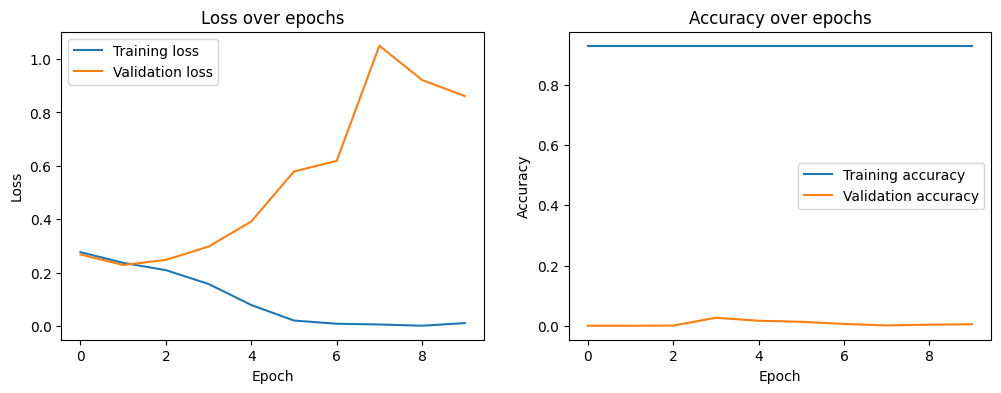

In [15]:
# 손실 그래프 그리기
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Training loss')
plt.plot(val_losses, label='Validation loss')
plt.title('Loss over epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# 정확도 그래프 그리기
plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label='Training accuracy')
plt.plot(val_accuracies, label='Validation accuracy')
plt.title('Accuracy over epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

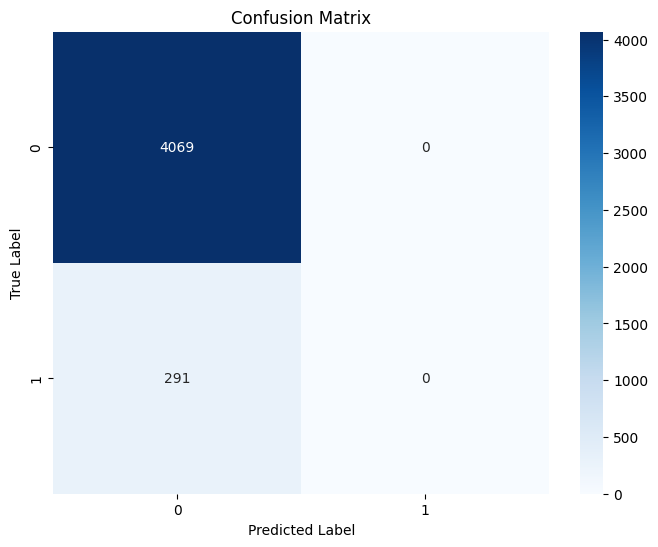

Accuracy: 0.9333
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


In [16]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns

# 모델을 평가 모드로 설정
model.eval()

# 모든 예측과 레이블을 저장할 리스트 초기화
all_predictions = []
all_labels = []

# 테스트 데이터에 대한 예측 수행
with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        all_predictions.extend(predicted.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# 성능 지표 계산
accuracy = accuracy_score(all_labels, all_predictions)
precision = precision_score(all_labels, all_predictions)
recall = recall_score(all_labels, all_predictions)
f1 = f1_score(all_labels, all_predictions)

# 혼동 행렬 생성
cm = confusion_matrix(all_labels, all_predictions)

# 혼동 행렬 시각화
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# 성능 지표 출력
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

In [17]:
from sklearn.metrics import roc_curve, auc

# 예측 확률을 저장할 리스트
all_preds_probs = []

# 모델을 평가 모드로 설정
model.eval()

# 테스트 데이터에 대한 예측 확률 수행
with torch.no_grad():
    for inputs, _ in test_loader:
        inputs = inputs.to(device)
        outputs = model(inputs)
        # softmax를 사용하여 확률을 계산
        probs = torch.nn.functional.softmax(outputs, dim=1)
        all_preds_probs.extend(probs.cpu().numpy())

# 실제 레이블과 예측 확률을 사용하여 ROC 커브 계산
fpr, tpr, _ = roc_curve(all_labels, [p[1] for p in all_preds_probs])
roc_auc = auc(fpr, tpr)

# AUROC 그래프를 그립니다.
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

# AUROC 점수를 출력합니다.
print(f'AUROC: {roc_auc:.2f}')

IndexError: index 1 is out of bounds for axis 0 with size 1

In [102]:
predict=torch.Tensor(df_sph_lead1)
predict=predict.unsqueeze(1)
predict_label=df_sph['label']


In [106]:
predict_label=torch.Tensor(predict_label)

In [109]:
predict=predict.to(device)
predict_label=predict_label.to(device)

In [112]:
batch_size=32
testdataset=TensorDataset(predict,predict_label)
testdataloder=DataLoader(testdataset, shuffle=True, batch_size=batch_size)


In [111]:
batch_size=32
sph_loader = DataLoader(predict, shuffle=True, batch_size=batch_size)
sph_label_loader = DataLoader(predict_label, batch_size=batch_size)

In [116]:
# 테스트 데이터 루프
model.eval()
with torch.no_grad():
    for inputs, labels in tqdm(testdataloder, desc=f"Testing"):
        inputs, labels = inputs.to(device), labels.to(device)  # 데이터를 GPU로 이동
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        test_accuracy += (predicted == labels).sum().item()

test_accuracy /= len(testdataloder.dataset)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

Testing: 100%|██████████| 806/806 [00:03<00:00, 260.96it/s]

Test Accuracy: 69.61%


# 4. model  평가 및 고도화
- 하이퍼 파라미터 튜닝
- 드롭아웃
- 정규화 
- 리샘플링
- optimizer(최적화)


In [ ]:
import torch
import torch.nn as nn

class Complex1DCNN(nn.Module):
    def __init__(self, input_size, output_size, conv_channels=[64, 128, 256], kernel_sizes=[3, 5, 7], fc_hidden_size=256, dropout_prob=0.5):
        super(Complex1DCNN, self).__init__()

        # 여러 개의 1D 컨볼루션 레이어
        self.conv_layers = nn.ModuleList([
            nn.Conv1d(in_channels=input_size, out_channels=conv_channels[0], kernel_size=kernel_sizes[0]),
            nn.Conv1d(in_channels=conv_channels[0], out_channels=conv_channels[1], kernel_size=kernel_sizes[1]),
            nn.Conv1d(in_channels=conv_channels[1], out_channels=conv_channels[2], kernel_size=kernel_sizes[2])
        ])

        # ReLU 활성화 함수
        self.relu = nn.ReLU()

        # Max Pooling 레이어
        self.pool = nn.MaxPool1d(kernel_size=2)

        # Global Average Pooling 레이어
        self.global_avg_pool = nn.AdaptiveAvgPool1d(1)

        # 드롭아웃
        self.dropout = nn.Dropout(p=dropout_prob)

        # 완전 연결 레이어
        self.fc = nn.Linear(conv_channels[-1], fc_hidden_size)
        
        # 출력 레이어
        self.output_layer = nn.Linear(fc_hidden_size, output_size)

    def forward(self, x):
        # 여러 개의 1D 컨볼루션 레이어를 통과
        for conv_layer in self.conv_layers:
            x = self.pool(self.relu(conv_layer(x)))

        # Global Average Pooling
        x = self.global_avg_pool(x).squeeze()

        # 드롭아웃
        x = self.dropout(x)

        # 완전 연결 레이어를 통과하여 중간 특성 추출
        x = self.relu(self.fc(x))

        # 출력 레이어를 통과하여 최종 출력 생성
        x = self.output_layer(x)

        return x